# Project Structure and Problem Solving Steps
- **About Dataset**
- **Import Libraries**
- **Prepare Data**
    - Import
    - Explore
    - Split
- **Build Model(Logistics/Decision trees) & Communication**
- **Save Model**
- **Report**

# About Dataset

Citation: _https://www.kaggle.com/fedesoriano/heart-failure-prediction_

**Context**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Attribute Information**
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

**Source**

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations
Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: _https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/_


### Potential Features Description

| Feature            | Type                   | Description                                                                                                                                  | Importance/Notes                                                                                              |
| ------------------ | ---------------------- | -------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------- | 
| **ChestPainType**  | Categorical (nominal)  | Type of chest pain experienced: <br>• `TA`: Typical Angina<br>• `ATA`: Atypical Angina<br>• `NAP`: Non-Anginal Pain<br>• `ASY`: Asymptomatic | Highly predictive — Chest pain is a strong indicator of heart issues. One-hot encoding is recommended.        |
| **RestingBP**      | Numerical (continuous) | Resting blood pressure (mm Hg)                                                                                                               | Moderate importance. Very high or low values can be risky. Check for outliers and correlations.               |
| **Cholesterol**    | Numerical (continuous) | Serum cholesterol in mg/dl                                                                                                                   | Useful, but not always a strong predictor alone. Watch for outliers. 0 values may indicate missing or errors. |
| **FastingBS**      | Categorical (binary)   | Fasting blood sugar > 120 mg/dl<br>• `1` = High<br>• `0` = Normal                                                                            | Low–moderate impact. Affected by diabetes, which is a risk factor for heart disease.                          |
| **RestingECG**     | Categorical (nominal)  | ECG at rest:<br>• `Normal`<br>• `ST` = ST-T wave abnormality<br>• `LVH` = Left Ventricular Hypertrophy                                       | Often informative. LVH can directly point to cardiac dysfunction. One-hot encode this.                        |
| **MaxHR**          | Numerical (continuous) | Max heart rate achieved during exercise                                                                                                      | Strong signal. Low values can indicate poor heart response. May show inverse relationship with risk.          |
| **ExerciseAngina** | Categorical (binary)   | Angina induced by exercise:<br>• `Y` = Yes<br>• `N` = No                                                                                     | Strong predictor. Pain during exertion is a red flag. Encode as 0/1.                                          |
| **Oldpeak**        | Numerical (continuous) | ST depression induced by exercise relative to rest                                                                                           | Very informative. Reflects ischemia (lack of blood flow). Higher values → greater risk.                       |
| **ST\_Slope**      | Categorical (ordinal)  | Slope of peak exercise ST segment:<br>• `Up`, `Flat`, `Down`                                                                                 | Important. ‘Flat’ or ‘Down’ often signal abnormalities. Can be encoded ordinally or one-hot.                  |


# Import Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# model development libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# accuracy check 
from sklearn.metrics import accuracy_score

# Prepare Data 

## Import

In [7]:
# Using function, declare a function 

def wrangle(filepath):
    # read csv 
    df = pd.read_csv(filepath)

    return df

In [8]:
# filepath = "dataset/cardio_fusion_net_extended.csv"
filepath = "dataset/heart.csv"
df = wrangle(filepath)

In [9]:
df.head()
# df.shape

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Explore

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Text(0.5, 1.0, 'Age Distribution')

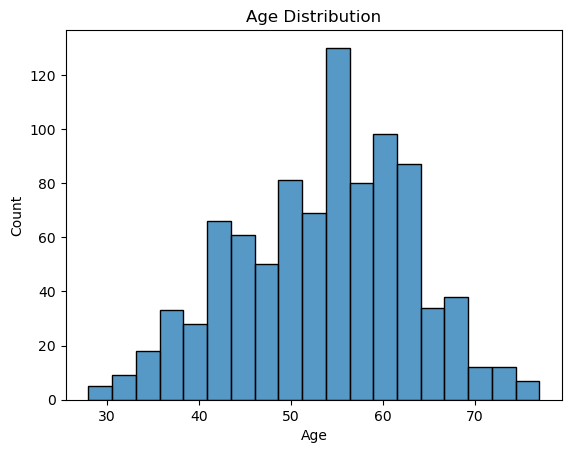

In [12]:
# df.plot?
# df["Age"].plot(kind="hist", title="Age Distribution",)
sns.histplot(df["Age"])
plt.title("Age Distribution")

In [13]:
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [14]:
# df.groupby("ChestPainType")["Sex"].count()
# df.pivot_table?

In [15]:
table = pd.pivot_table(
    df,
    values="MaxHR",
    index=["HeartDisease"],
    columns=["ChestPainType",],
    aggfunc="sum",
)
table

ChestPainType,ASY,ATA,NAP,TA
HeartDisease,,,,
0,14409,22686,19734,3913
1,49316,3300,9343,2890


### Class Balance 

In [17]:
# heart_disease = df["HeartDisease"].value_counts()
heart_disease = df["HeartDisease"].value_counts(normalize=True)
heart_disease

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

| Label (`HeartDisease`) | Proportion |
| ---------------------- | ---------- |
| 1 (has heart disease)  | 55.3%      |
| 0 (no heart disease)   | 44.7%      |
| **The class distribution is Balanced.** |
| **No need for resampling**           |

<Axes: title={'center': 'Class Balance'}, xlabel='Heart Disease', ylabel='Frequency'>

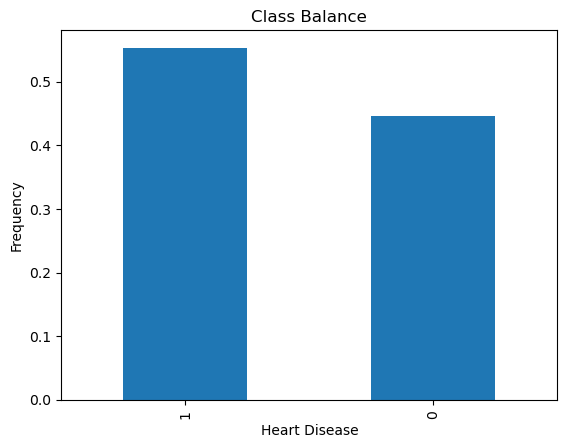

In [19]:
heart_disease.plot(kind="bar", xlabel="Heart Disease", ylabel="Frequency", title="Class Balance")

<Axes: xlabel='HeartDisease', ylabel='MaxHR'>

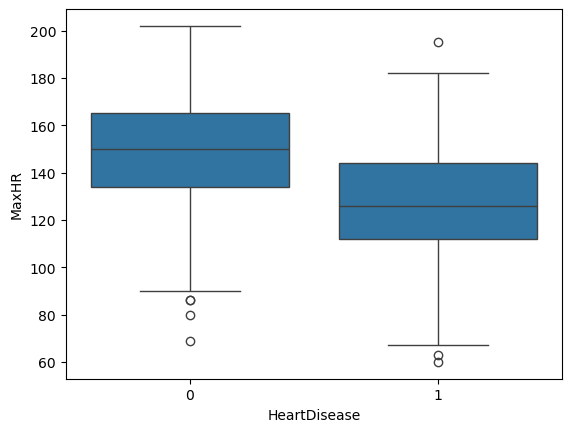

In [20]:
# feature Boxplot for the two classes 
sns.boxplot(x="HeartDisease", y="MaxHR", data=df)

### Check For Correlation on number Types

<Axes: >

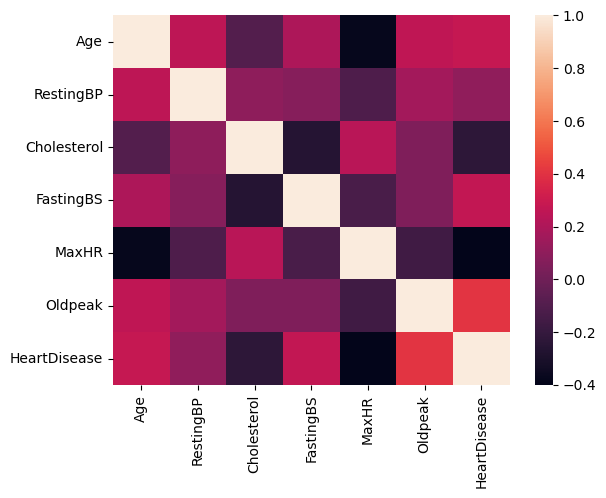

In [22]:
df_numeric = df.select_dtypes("number")
correlation = df_numeric.corr()
sns.heatmap(correlation)

In [23]:
# Rank features by their correlation with HeartDisease
correlation['HeartDisease'].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

**Interpretaion of Correlation**
| Numeric Features | Correlation with `HeartDisease` | Interpretation                                                                                                                                                                                            |
| ---------------- | ------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Oldpeak**      | +0.404                          | 🟢 **Moderate positive** correlation – higher ST depression is linked with higher heart disease risk. Strong predictive feature.                                                                          |
| **Age**          | +0.282                          | 🟢 **Weak to moderate positive** correlation – older individuals are slightly more likely to have heart disease.                                                                    |
| **FastingBS**    | +0.267                          | 🟢 **Weak positive** correlation – high fasting blood sugar (>120 mg/dL) increases the likelihood of heart disease. Some signal here.                                                                     |
| **RestingBP**    | +0.108                          | 🟡 **Very weak** correlation – not strongly associated, may not add much predictive value alone.                                                                                                          |
| **Cholesterol**  | –0.233                          | 🔵 **Weak negative** correlation – unexpected direction; suggests that in your dataset, higher cholesterol is slightly **less** associated with heart disease. May reflect outliers or medications (statins). |
| **MaxHR**        | –0.400                          | 🔵 **Moderate negative** correlation – **lower** max heart rate achieved → **higher** likelihood of heart disease. Strong signal.                                                                         |

Text(0.5, 1.0, 'Cholesterol Distribution')

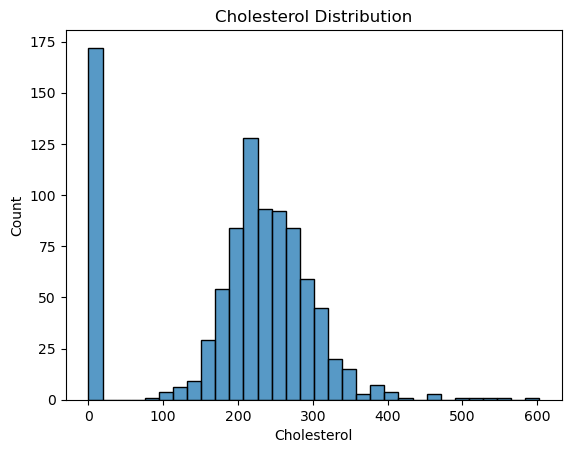

In [25]:
# Investigate Cholesterol for outliers
# Plot histogram or boxplot 
sns.histplot(df["Cholesterol"])
plt.title("Cholesterol Distribution")

In [26]:
# sns.boxplot?

Text(0.5, 1.0, 'Cholesterol Distribution')

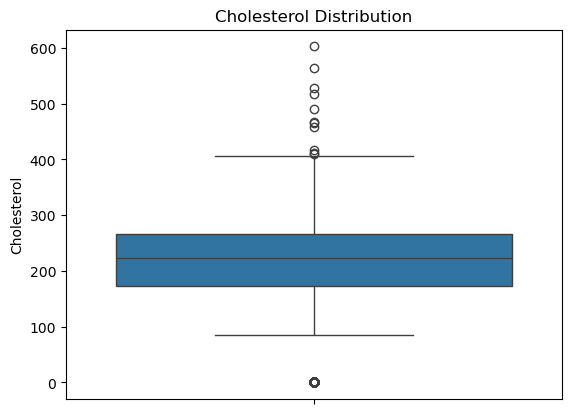

In [27]:
sns.boxplot(df["Cholesterol"])
plt.title("Cholesterol Distribution")

**Note - Zero values are recorded for Cholesterol, clinically, a cholesterol level cannot be 0. Cholesterol is a vital substance that your body needs to function.**

In [29]:
chol_zero = df[df["Cholesterol"] == 0]
# chol_zero
print("Cholesterol with Zero values", chol_zero['Cholesterol'].value_counts())

Cholesterol with Zero values Cholesterol
0    172
Name: count, dtype: int64


In [30]:
# Cleaning Out Zero: 
# df.info()

# What is the % of 172 in 918
chol_zero_percentage = 172/918 * 100
chol_zero_percentage

# 18.74% is too high to drop 

18.736383442265794

In [31]:
# copy df 
df_chol = df.copy()

# Perform Data Imputation 
chol_median = df_chol[df_chol["Cholesterol"] > 0]["Cholesterol"].median()
chol_median

# Replace Zeros with the median 
df_chol.loc[df_chol["Cholesterol"] == 0, "Cholesterol"] = chol_median

Text(0.5, 1.0, 'Cholesterol Distribution After Median Imputation')

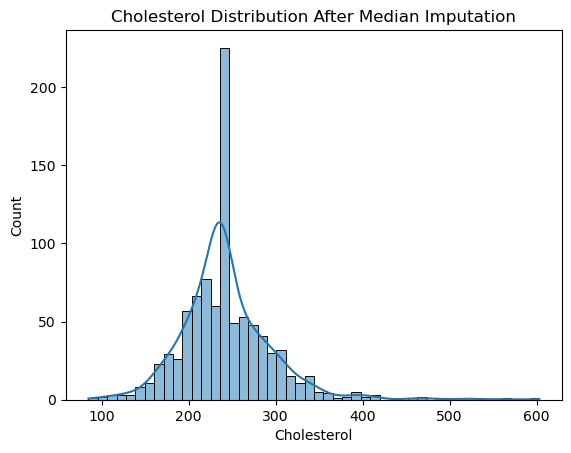

In [32]:
# Recheck Distribution
sns.histplot(df_chol['Cholesterol'], kde=True)
# sns.boxplot(df['Cholesterol'])
plt.title("Cholesterol Distribution After Median Imputation")

In [33]:
print("Correlation Ranking After Median Imputation")
correlation = df_chol.select_dtypes("number").corr()
correlation['HeartDisease'].sort_values(ascending=False)

Correlation Ranking After Median Imputation


HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol     0.076114
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

| Numeric Features | Correlation with `HeartDisease` After Imputation | Interpretation                                                                                                                                                                                            |
| ---------------- | ------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Cholesterol**  | +0.0761                          | 🔵 **Weak positive** correlation –  not strongly associated, may not add much predictive value alone.|


In [35]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

# # Add a constant for intercept
# X = add_constant(df_numeric.drop(columns=["HeartDisease"]))  # exclude target
# vif_data = pd.DataFrame()
# vif_data["Feature"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif_data

### Check for Cardinality 
*The degree of number of unique values in categorical variables*

Cardinality with high number of unique values should be dropped

In [37]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Sex: 2 unique values
ChestPainType: 4 unique values
RestingECG: 3 unique values
ExerciseAngina: 2 unique values
ST_Slope: 3 unique values


In [38]:
# No high Cardinality 

## Split 

In [40]:
# We have two datasets, df and df_chol contain Cholesterol value = 0, and != 0 respectively 
# Although, both correlation are insignicant when compared with HeartDisease 

In [41]:
# X = df.drop(columns='HeartDisease')
# y = df["HeartDisease"]

# cholesterol cleaned 
X = df_chol.drop(columns='HeartDisease')
y = df_chol["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(734, 11)
(734,)
(184, 11)
(184,)


In [42]:
# df_chol[df_chol["Cholesterol"] == 0].head()

# Build Model

In [44]:
## Baseline Accuracy score 

In [45]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Model Baseline Accuracy:", acc_baseline)

Model Baseline Accuracy: 0.5463215258855586


In [46]:
## Train model

**Feature Engineering** is the process of transforming raw data into meaningful input that improves a machine learning model’s performance.


### Using Logistics Regression Algorithm

In [49]:
# build pipeline 
logistics_model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=1000)
)

# fit model
logistics_model.fit(X_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Sex', 'ChestPainType', 'RestingECG',
                                     'ExerciseAngina', 'ST_Slope'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [50]:
logistics_model.predict(X_test)

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [51]:
## Evaluate

In [52]:
# Check for Accuracy 
# Train predictions
y_pred_train = logistics_model.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)

# Test predictions
y_pred_test = logistics_model.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)

print("Accuracy Score for Training:", acc_train)
print("Accuracy Score for Test:", acc_test)

Accuracy Score for Training: 0.8623978201634878
Accuracy Score for Test: 0.8641304347826086


|Interpretation of Accuracy
| Metric                | Value   | Meaning                                                    |
| --------------------- | ------- | ---------------------------------------------------------- |
| **Baseline Accuracy** | `0.546` | Predicting only the majority class (no model intelligence) |
| **Train Accuracy**    | `0.862` | Model learned patterns in the training data                |
| **Test Accuracy**     | `0.864` | Model generalizes well to unseen data                      |

In [54]:
# from sklearn.model_selection import cross_val_score

# # Evaluate using 5-fold cross-validation
# cv_scores = cross_val_score(logistics_model, X_train, y_train, cv=5, scoring='accuracy')

# # Print the results
# print("Cross-Validation Scores (Accuracy):", cv_scores)
# print("Mean CV Accuracy:", cv_scores.mean())
# print("Standard Deviation:", cv_scores.std())

#### Communication 

In [56]:
y_train_pred_prob = logistics_model.predict_proba(X_train)
y_train_pred_prob

array([[0.62339326, 0.37660674],
       [0.95624003, 0.04375997],
       [0.02037106, 0.97962894],
       ...,
       [0.35304289, 0.64695711],
       [0.48511527, 0.51488473],
       [0.38143237, 0.61856763]])

<Axes: title={'center': 'Top 10 Feature Importances - Logistics Regression'}>

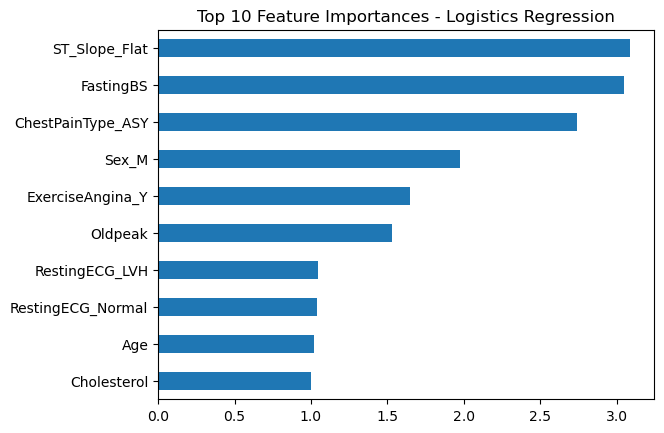

In [165]:
### Odd Ratio
features = logistics_model.named_steps["onehotencoder"].get_feature_names_out()
importances = logistics_model.named_steps["logisticregression"].coef_[0]
# odd_ratios = pd.Series(importances, index=features).sort_values()

# convert values to odd ratios
odds_ratios = np.exp(importances)
odds_ratios_series = pd.Series(odds_ratios, index=features).sort_values().tail(10)
odds_ratios_series.plot(kind="barh", title="Top 10 Feature Importances - Logistics Regression")


# Convert to Series
# lr_series = pd.Series(importances, index=features, name="LogisticRegression")
# .plot(kind="barh", title="Top 10 Feature Importances - Logistics Regression")

##### 📈 Interpretation of the Chart:

* You’re seeing the **10 features with the highest odds ratios** (i.e., those most associated with increased likelihood of heart disease).
* Odds ratio > 1 → **increase** the odds of the positive class (HeartDisease = 1).
* Odds ratio < 1 → **decrease** the odds.
* Odds ratio = 1 → **no effect**.

For example:

* If `ChestPainType_ASY` has an odds ratio of **2.7**, that means it increases the odds of having heart disease by **200%** (i.e., 2.7x more likely).
* If `ExerciseAngina_N` has an odds ratio of **0.6**, it **reduces** the odds by **40%**.

### Using Decision Trees Classifier

In [132]:
# Pipeline?

In [134]:
# build pipeline 
dtree_model = Pipeline([
    ("encoder", OrdinalEncoder()),
    ("dtree", DecisionTreeClassifier(random_state=48))
])

# fit model
dtree_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 OrdinalEncoder(cols=['Sex', 'ChestPainType', 'RestingECG',
                                      'ExerciseAngina', 'ST_Slope'],
                                mapping=[{'col': 'Sex', 'data_type': dtype('O'),
                                          'mapping': M      1
F      2
NaN   -2
dtype: int64},
                                         {'col': 'ChestPainType',
                                          'data_type': dtype('O'),
                                          'mapping': NAP    1
ASY    2
TA     3
ATA    4
NaN   -2
dtype: int64},
                                         {'col': 'RestingECG',
                                          'data_type': dtype('O'),
                                          'mapping': Normal    1
LVH       2
ST        3
NaN      -2
dtype: int64},
                                         {'col': 'ExerciseAngina',
                                          'data_type': dtype('O'),
                                          'mapping': N      1
Y      2
NaN   -2
dtype: int64},
                                         {'col': 'ST_Slope',
                                          'data_type': dtype('O'),
                                          'mapping': Down    1
Up      2
Flat    3
NaN    -2
dtype: int64}])),
                ('dtree', DecisionTreeClassifier(random_state=48))])

In [136]:
# Evaluate model 
acc_baseline = y_train.value_counts(normalize=True).max()
print("Model Baseline Accuracy:", acc_baseline)

# Check for Accuracy 
# Train predictions
# y_pred_train = dtree_model.predict(X_train)
acc_train = dtree_model.score(X_train, y_train)

# Test predictions
# y_pred_test = dtree_model.predict(X_test)
acc_test = dtree_model.score(X_test, y_test)

print("Accuracy Score for Training with DecisionTree:", acc_train)
print("Accuracy Score for Test with DecisionTree:", acc_test)

Model Baseline Accuracy: 0.5463215258855586
Accuracy Score for Training with DecisionTree: 1.0
Accuracy Score for Test with DecisionTree: 0.7771739130434783


**📊 Model Comparison: Logistic Regression vs. Decision Tree**

| Metric                | Logistic Regression | Decision Tree |
| --------------------- | ------------------- | ------------- |
| **Baseline Accuracy** | 0.546               | 0.546         |
| **Training Accuracy** | 0.862               | 1.000         |
| **Test Accuracy**     | 0.864               | 0.777         |

**Conclusion:**

While both models performed better than the baseline, **Logistic Regression** generalizes better, as seen in its **higher test accuracy (86.4%)** compared to Decision Tree (**77.7%**). The Decision Tree model shows signs of overfitting and would benefit from hyperparameter tuning. For now, Logistic Regression is the preferred model based on current results.

In [117]:
# tree depth 
tree_depth = dtree_model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth is", tree_depth)

Tree Depth is 12


#### Hyperparameter Tuning

In [120]:
# Define hyperparameter grid
param_grid = {
    "dtree__max_depth": [3, 5, 7, 10, 12],
    "dtree__min_samples_split": [2, 5, 10],
    "dtree__min_samples_leaf": [1, 5, 10],
    "dtree__criterion": ["gini", "entropy"]
}

In [138]:
# Grid Search
grid_search = GridSearchCV(
    estimator=dtree_model,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

In [140]:
# Fit model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        OrdinalEncoder(cols=['Sex',
                                                             'ChestPainType',
                                                             'RestingECG',
                                                             'ExerciseAngina',
                                                             'ST_Slope'],
                                                       mapping=[{'col': 'Sex',
                                                                 'data_type': dtype('O'),
                                                                 'mapping': M      1
F      2
NaN   -2
dtype: int64},
                                                                {'col': 'ChestPainType',
                                                                 'data_type': dtype('O'),
                                                                 'mapping': NAP    1
ASY    2
TA     3
ATA    4
NaN   -2
dtype: int64},
                                                                {'col': 'RestingECG',
                                                                 'data_type': dtype('O'),
                                                                 '...
                                                                 'mapping': N      1
Y      2
NaN   -2
dtype: int64},
                                                                {'col': 'ST_Slope',
                                                                 'data_type': dtype('O'),
                                                                 'mapping': Down    1
Up      2
Flat    3
NaN    -2
dtype: int64}])),
                                       ('dtree',
                                        DecisionTreeClassifier(random_state=48))]),
             n_jobs=-1,
             param_grid={'dtree__criterion': ['gini', 'entropy'],
                         'dtree__max_depth': [3, 5, 7, 10, 12],
                         'dtree__min_samples_leaf': [1, 5, 10],
                         'dtree__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [141]:
# Parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy with Best Model:", test_accuracy)


Best Parameters: {'dtree__criterion': 'entropy', 'dtree__max_depth': 5, 'dtree__min_samples_leaf': 10, 'dtree__min_samples_split': 2}
Best CV Accuracy: 0.837862268194949
Test Accuracy with Best Model: 0.8315217391304348


| Model                     | Test Accuracy | Notes                      |
| ------------------------- | ------------- | -------------------------- |
| Logistic Regression       | **0.864**     | Best generalization so far |
| Decision Tree (Raw)       | 0.777         | Overfitting (depth=12)     |
| **Decision Tree (Tuned)** | **0.810**     | Improved after tuning      |

In [153]:
# Communication 

Text(0.5, 0, 'Importance Score')

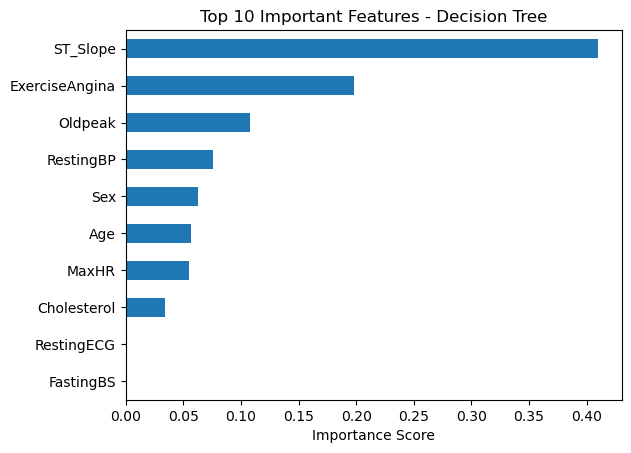

In [155]:
## feature importance 
feature = X_train.columns
importances = grid_search.best_estimator_.named_steps["dtree"].feature_importances_
feat_imp = pd.Series(importances, index=feature).sort_values()
feat_imp.tail(10).plot(kind='barh')
plt.title("Top 10 Important Features - Decision Tree")
plt.xlabel("Importance Score")

# Save Models

In [168]:
import pickle

In [170]:
with open('HDP-logistics_model.pkl', 'wb') as file:
    pickle.dump(logistics_model, file)

In [172]:
with open('HDP-decisionTree.pkl', 'wb') as file:
    pickle.dump(dtree_model, file)

# Report 

Kindly open the report.md file